In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [6]:
data=pd.read_csv("GoldUP.csv")
data.isna().sum()

Date             0
Gold_Price       0
Crude_Oil        0
Interest_Rate    0
USD_INR          0
Sensex           0
CPI              0
USD_Index        0
dtype: int64

In [7]:
data['Date']=pd.to_datetime(data['Date'])
data=data.sort_values(by='Date')
UniqueDate=pd.to_datetime(data['Date'])
#initially set to all the available dates

## Resampling Timestamp in the data

#### First Step we make the date as the index as it one considered of the requirements to apply the sampling
#### Then we sample the data based on selected input in our case we will sample by minute to generate more data

In [8]:
data.set_index('Date', drop=True, inplace=True)
data=data.resample('3Min').interpolate(method='linear')
data['Gold_Price']=np.random.normal(0,.2, len(data))
data['Interest_Rate']=np.random.normal(0, .2, len(data))

#### Creating a method to Extract the data based on specific dates

In [9]:
trails=len(UniqueDate)
def SelectUniqueDate():
    SelectedField=[]
    for i in range(trails):
        SelectedField.append(data.loc[data.index.floor('D')==UniqueDate[i], ['Interest_Rate','Gold_Price']])
    return SelectedField

In [10]:
def ApplyLinearRegression(X, Y):
    x_train, x_test, y_train, y_test=train_test_split(X, Y, test_size=0.3, random_state=42)
    Model=LinearRegression()
    Model.fit(x_train, y_train)
    Ypredicted=Model.predict(x_test)
    R_Squared=r2_score(y_test, Ypredicted)
    Mean2_Error=mean_squared_error(y_test, Ypredicted)
    MeanA_Error=mean_absolute_error(y_test, Ypredicted)
    return x_test, Ypredicted, Model, R_Squared, Mean2_Error, MeanA_Error
    #returning y_test to calculate the output for the new input

In [11]:
def ModelApplication():
    Field=SelectUniqueDate()
    ModelComparison=[]
    ModelComparisonFrame=pd.DataFrame()
    for i in range(trails-1):
        x=pd.DataFrame(Field[i]['Interest_Rate'])
        y=pd.DataFrame(Field[i]['Gold_Price'])
        x_test, Ypredicted, Model, R_Squared, Mean2_Error, MeanA_Error=ApplyLinearRegression(x, y)
        day=i+1
        dayIndex=index =Field[i].index[0]
        ComparisonFrame=pd.DataFrame({
            "Day":[day],
            "Rsquared":[R_Squared],
            "Mean_Squared_Error":[Mean2_Error],
            "Mean_Absolute_Error":[MeanA_Error],
        } , index=[dayIndex]
        )
        ModelComparisonFrame=pd.concat([ModelComparisonFrame, ComparisonFrame], ignore_index=True)
    
    return ModelComparisonFrame
    
Model_C_F=ModelApplication()
Model_C_F

,Day,Rsquared,Mean_Squared_Error,Mean_Absolute_Error
0,1,0.002246,0.033262,0.143963
1,2,-0.023027,0.033979,0.148776
2,3,0.004534,0.041051,0.164899
3,4,-0.001980,0.041060,0.156220
4,5,-0.023123,0.043209,0.167472
...,...,...,...,...
233,234,0.000152,0.043149,0.168832
234,235,0.000162,0.044316,0.174747
235,236,-0.013501,0.039288,0.157882
236,237,-0.069137,0.040040,0.158222


In [12]:
# Testing the model from user input
day=7
def Display():
    Field=SelectUniqueDate()
    ModelComparison=[]
    ModelComparisonFrame=pd.DataFrame()
    x=pd.DataFrame(Field[day]['Interest_Rate'])
    y=pd.DataFrame(Field[day]['Gold_Price'])
    x_test, Ypredicted, Model, R_Squared, Mean2_Error, MeanA_Error=ApplyLinearRegression(x, y)    
    Interest_Rate=float(input("Enter the USD Interest Rate to display the Gold Price Chnage: "))
    Interest_Rate=pd.DataFrame({'Interest_Rate':[Interest_Rate]})
    value=Model.predict(Interest_Rate).item()
    print(f"The USD Change for the same is {value:.2f} \nThe R squared is {float(R_Squared):.6f}")
    
Display()

Enter the USD Interest Rate to display the Gold Price Chnage:  45


The USD Change for the same is 3.58 
The R squared is -0.015780


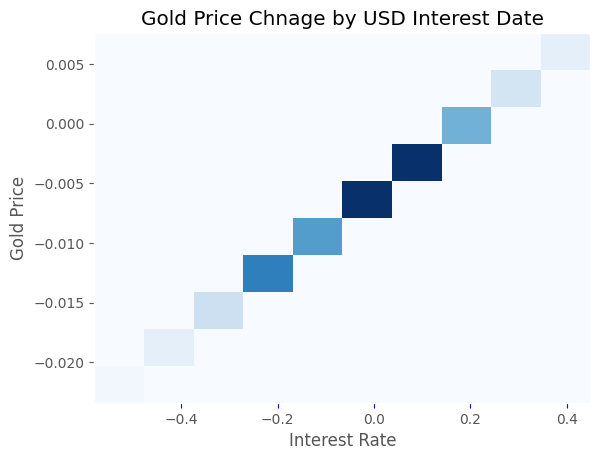

In [13]:
plt.style.use('ggplot')
def Visualize():
    Data=SelectUniqueDate()
    Field=ModelApplication()
    BestRsquaredDay=Field.loc[Field['Rsquared'].idxmax(),'Day']
    x=pd.DataFrame(Data[BestRsquaredDay]['Interest_Rate'])
    y=pd.DataFrame(Data[BestRsquaredDay]['Gold_Price'])
    x_test, Ypredicted, Model, R_Squared, Mean2_Error, MeanA_Error=ApplyLinearRegression(x, y)
    Ypredicted=Ypredicted.ravel()
    x_test=x_test.assign(Gold_Price=Ypredicted)
    fig, ax=plt.subplots()
    plt.hist2d(x_test['Interest_Rate'], x_test['Gold_Price'], bins=(10,10), cmap='Blues')
    ax.tick_params(axis='x', color='blue')
    ax.tick_params(axis='x', color='blue')
    ax.set_title("Gold Price Chnage by USD Interest Date")
    ax.set_ylabel("Gold Price")
    ax.set_xlabel("Interest Rate")
    plt.show()
    
Visualize()    